## Decision Tree

Decision Trees are an important type of algorithm for predictive modeling machine learning.

The representation of the decision tree model is a binary tree. This is your binary tree from algorithms and data structures, nothing too fancy. Each node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction. Predictions are made by walking the splits of the tree until arriving at a leaf node and output the class value at that leaf node.

Trees are fast to learn and very fast for making predictions. They are also often accurate for a broad range of problems and do not require any special preparation for your data.

![title](images/Decision_Tree.png)

## Prepare Data

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# get data
iris = load_iris()
x = iris.data
y = iris.target

# split data into train(80%) & test(20%) data since we don't have anything to test on
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Decision Tree Classifier

### Parameter
 - criterion = "gini" OR "entropy", default="gini" ==> The function to measure the quality of a split.
 - max_depth = <int>, default=None ==> The maximum depth of the tree.
 - min_samples_split = <int> OR <float>, default=2 ==> The minimum number of samples required to split an internal node.
 - min_samples_leaf = <int> OR <float>, default=1 ==> The minimum number of samples required to be at a leaf node.
 - max_leaf_nodes = <int> OR None, default=None ==> Grow trees with max_leaf_nodes in best-first fashion.
 - random_state = <int> OR <RandomState>, default=None ==> Set the seed for the random number generator.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

# initialize classifier
decision_tree = DecisionTreeClassifier(max_depth=4)

# train/fit the model
decision_tree.fit(x_train, y_train)

# use the model to predict the classes of the test data
y_predict = decision_tree.predict(x_test)

# get the accuracy score
metrics.accuracy_score(y_test, y_predict)

0.9666666666666667

## Plotting The Tree

[Text(133.92000000000002, 195.696, 'X[2] <= 2.6\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(100.44000000000001, 65.232, 'X[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84

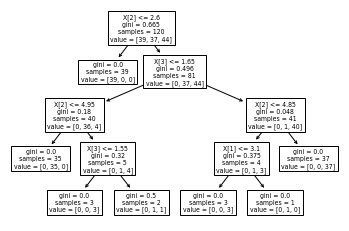

In [3]:
# 1st method
plot_tree(decision_tree)

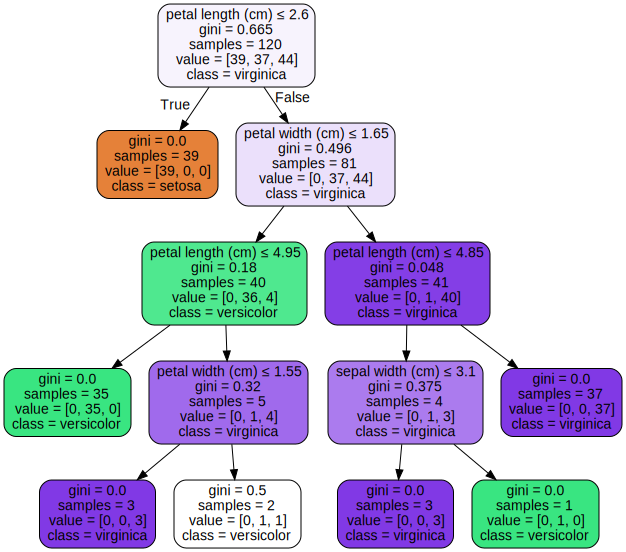

In [4]:
# 2nd method
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Ali\\PycharmProjects\\BigDataCourse\\ExtraLibraries\\graphviz\\bin'

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    decision_tree, 
    out_file=None, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    filled=True, 
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

## GridSearchCV (Grid Search with Cross-Validation) - Trying Different Parameter Values 
Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model.

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset.

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_leaf_nodes': list(range(2, 100)),
    'min_samples_split': [2, 3, 4]
}

# use gridsearch to test a range of values for the tree parameters
# cv is preferable to be 10 as most of the time this value gives good results
# cv = 10 means that x_train is splitted into 10 groups where 9 are for training and 1 is for testing
# these groups shuffle to search for the best train data for the model
decision_tree = DecisionTreeClassifier()
tree_gscv = GridSearchCV(decision_tree, param_grid, cv=10)

# fit model to data
tree_gscv.fit(x_train, y_train)

# predict
y_predict_gscv = tree_gscv.predict(x_test)

# check the best tree parameter values
print(f'Best Tree Parameters ==> {tree_gscv.best_params_}')

# mean best score
print(f'Mean Score = {tree_gscv.best_score_}')

# Accuracy score
print(f'Accuracy Score = {metrics.accuracy_score(y_test, y_predict_gscv)}')

Best Tree Parameters ==> {'max_leaf_nodes': 11, 'min_samples_split': 2}
Mean Score = 0.9583333333333333
Accuracy Score = 0.9666666666666667
